# Introduction
In this project I will be looking at a dataset on Beta Bank customers, and looking at why customers are slowly leaving the bank. In order to do so, I will make multiple models, and explore different parameters and class weights that can maximize the F1 score the model produces. We will be aiming to get an F1 score of at least 0.59. 

## Importing Libraries and loading dataframe

In [1]:
#importing all necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
display(df.sample(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
136,137,15802381,Li,461,Germany,Female,34,5.0,63663.93,1,0,1,167784.28,0
2788,2789,15726589,Matveyev,540,Germany,Male,39,1.0,82531.11,1,1,0,114092.52,0
4695,4696,15786739,Clements,669,France,Male,37,1.0,125529.55,1,1,1,162260.93,0
4269,4270,15580252,Waters,748,France,Male,44,4.0,112610.77,1,0,1,2048.55,0
2951,2952,15671655,Thorpe,763,Germany,Male,31,7.0,143966.30,2,1,1,140262.96,1
5241,5242,15581526,Iweobiegbulam,574,France,Male,41,1.0,0.00,2,0,0,70550.00,0
1493,1494,15686963,Hardiman,680,Spain,Female,30,3.0,0.00,1,1,0,160131.58,0
8944,8945,15752312,Howells,551,Spain,Male,49,1.0,150777.72,2,1,1,135757.27,0
8300,8301,15802625,Hardy,733,Germany,Male,48,7.0,85915.52,1,1,1,23860.50,0
2724,2725,15812628,Dodd,453,Germany,Female,38,NaN,120623.21,1,1,0,129697.99,0


## Data Preprocessing

In [5]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'rownumber':'row_number', 
                        'customerid': 'customer_id' , 
                        'creditscore':'credit_score', 
                        'numofproducts': 'num_of_products', 
                        'hascrcard':'has_cr_card', 
                        'isactivemember':'is_active_member', 
                        'estimatedsalary':'estimated_salary'})

Making all columns lowercase, and adding underscores where spaces should go. This is more of a personal preference, and not a necessary step. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Looking at the unique values in the tenure column to better determine how to deal with the missing values. 

In [8]:
df['tenure'].median()

5.0

In [9]:
df['tenure'] = df['tenure'].fillna(5.0)

Filling the missing values in the tenure column with the median value. 

In [10]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

Dropping columns that are not going to be used as features. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [12]:
new_df = pd.get_dummies(df, columns=['geography', 'gender'], drop_first=True)

Using dummies to make categorical features (geography and gender) into numerical features. 

In [13]:
new_df.sample(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
2459,576,63,9.0,70655.48,1,0,0,78955.80,1,0,0,1
3658,699,43,3.0,80764.03,1,1,0,199378.58,1,0,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
5578,687,50,5.0,0.00,2,1,0,110230.40,0,0,1,0
1954,624,51,5.0,174397.21,2,1,1,172372.63,0,0,1,1
3621,711,36,9.0,137688.71,1,1,1,46884.10,0,0,0,1
1760,521,38,5.0,110641.18,1,0,1,136507.69,1,0,0,1
1043,579,35,1.0,0.00,2,1,0,4460.20,0,0,0,1
3501,646,30,5.0,100548.67,2,0,0,136983.77,0,1,0,0
8338,602,42,1.0,138912.17,1,1,1,139494.75,0,0,1,0


In [14]:
features = new_df.drop(['exited'], axis=1)
target = new_df['exited']

0    0.7963
1    0.2037
Name: exited, dtype: float64


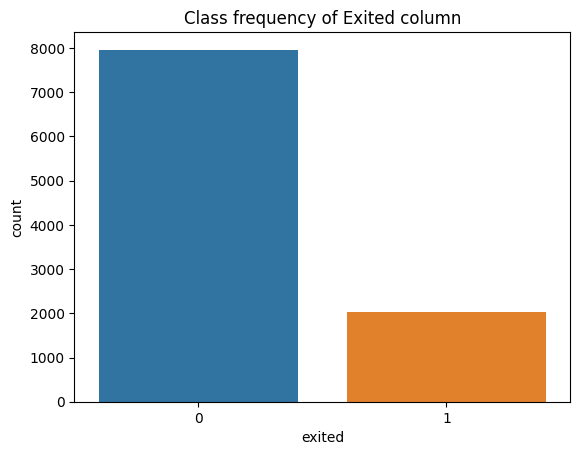

In [15]:
class_frequency = new_df['exited'].value_counts(normalize=True)
print(class_frequency)
sns.countplot(new_df['exited']).set_title('Class frequency of Exited column')
plt.show()

1    0.5151
0    0.4849
Name: is_active_member, dtype: float64


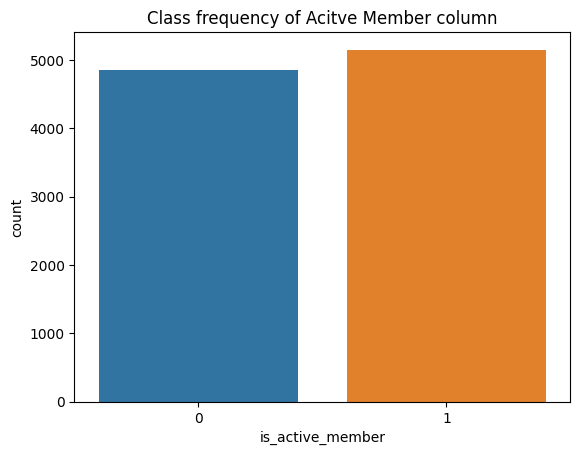

In [16]:
class_frequency = new_df['is_active_member'].value_counts(normalize=True)
print(class_frequency)
sns.countplot(new_df['is_active_member']).set_title('Class frequency of Acitve Member column')
plt.show()

1    0.5457
0    0.4543
Name: gender_Male, dtype: float64


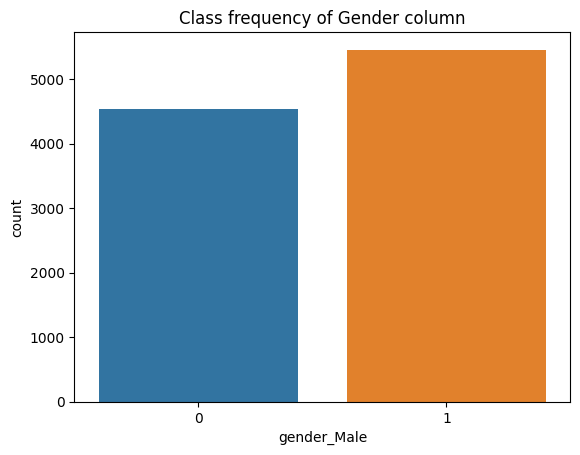

In [17]:
class_frequency = new_df['gender_Male'].value_counts(normalize=True)
print(class_frequency)
sns.countplot(new_df['gender_Male']).set_title('Class frequency of Gender column')
plt.show()

1    0.7055
0    0.2945
Name: has_cr_card, dtype: float64


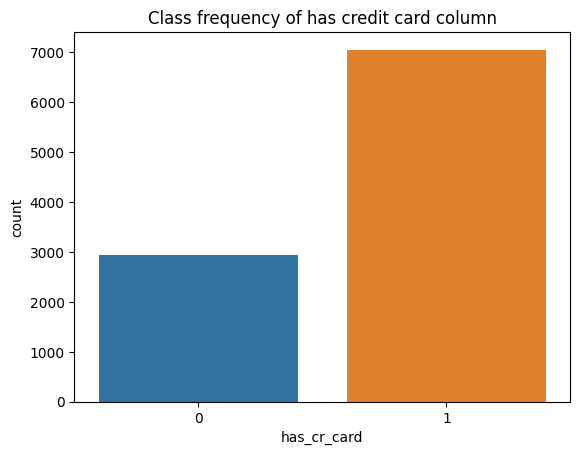

In [18]:
class_frequency = new_df['has_cr_card'].value_counts(normalize=True)
print(class_frequency)
sns.countplot(new_df['has_cr_card']).set_title('Class frequency of has credit card column')
plt.show()

**Balance of Classes** The classes of the target are not balanced, with a ratio of almost 4:1 leaning to the negative class. While looking at a few of the features, we see a different result. The active member and gender columns are pretty close to even. The has credit card column is imbalanced at a ratio of 7:3 in favor of the positive class. 

### Split data into training, validation, and test sets

In [19]:
#split source data into training set, and temp set to get validation and test sets
df_train, df_temp = train_test_split(new_df, test_size=0.4, random_state=12345)
#use temp set to split into validation and test sets
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

In [20]:
#variables for features and target of training set
features_train = df_train.drop(['exited'],axis=1)
target_train = df_train['exited']

In [21]:
#variables for features and target of validation set
features_valid = df_valid.drop(['exited'],axis=1)
target_valid = df_valid['exited']

In [22]:
#variables for features and target of test set
features_test = df_test.drop(['exited'],axis=1)
target_test = df_test['exited']

Defining the variables for features and targets of the train and validation sets.

In [23]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


### Standardize numerical features

In [24]:
pd.options.mode.chained_assignment = None
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()

scaler.fit(features_train[numeric])
scaler.fit(features_valid[numeric])
scaler.fit(features_test[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Standardizing the numerical features.

## Logistic Regression model

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
f1 = f1_score(target_valid, prediction)
accuracy = accuracy_score(target_valid, prediction)
print(f"F1 Score: {f1}")
print(accuracy)


F1 Score: 0.33108108108108103
0.802


Trained the model without fixing the imbalance. The F1 score is not as bad as I thought it would be (0.33), but it's still a ways off from our goal of at least 0.59. 

### balanced class weights

In [26]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
f1 = f1_score(target_valid, prediction)
accuracy = accuracy_score(target_valid, prediction)
print(f"F1 Score: {f1}")
print(accuracy)


F1 Score: 0.4888507718696398
0.702


After setting the class weight to balanced, the F1 score improved considerably to 0.49. A solid improvement for this model, but still some work to do. 

### Upsampling

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [28]:
model1 = LogisticRegression(random_state=12345, solver='liblinear')
model1.fit(features_upsampled, target_upsampled)
prediction = model1.predict(features_valid)
print('F1:', f1_score(target_valid, prediction))

F1: 0.4194260485651214


Tried upsampling to see how it would effect the f1 score, and it lowered it to 0.42.

### Downsampling

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [30]:
model2 = LogisticRegression(random_state=12345, solver='liblinear')
model2.fit(features_downsampled, target_downsampled)
prediction = model2.predict(features_valid)
print('F1:', f1_score(target_valid, prediction))

F1: 0.4308390022675737


Tried downsampling to see how it would effect the f1 score, and it lowered to 0.43.

## Tree Model

In [31]:
tree = DecisionTreeClassifier(random_state=12345)
tree.fit(features_train, target_train)
prediction = tree.predict(features_valid)
f1 = f1_score(target_valid, prediction)
accuracy = accuracy_score(target_valid, prediction)
print(f"F1 Score: {f1}")
print(accuracy)


F1 Score: 0.5036319612590799
0.795


Made a decision tree model to see if it would be better than the logistic regression model. We got an F1 score of 0.50, which is just about where the Logistic Regression model was. Seems that both would be a good option to continue tinkering with.

In [32]:
from sklearn._config import get_config, set_config
set_config(print_changed_only=False)
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=12345,
                       splitter='best')

In [33]:
for depth in range(1, 6):
    tree = DecisionTreeClassifier(random_state=12345, class_weight = 'balanced', max_depth=depth)
    tree.fit(features_train, target_train)
    prediction = tree.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, prediction))

max_depth = 1 : 0.4994903160040775
max_depth = 2 : 0.541015625
max_depth = 3 : 0.541015625
max_depth = 4 : 0.5277777777777778
max_depth = 5 : 0.5963791267305644


Seeing which value for max depth gives us a better f1 score. Max depth of 5 has us just above our goal with 0.60, so we could continue on with this as the final model. That being said, we will first see how upsampling and downsampling effect the F1 score. 

### Upsampling

In [34]:
tree2 = DecisionTreeClassifier(random_state=12345, max_depth=5)
tree2.fit(features_upsampled, target_upsampled)
prediction = tree2.predict(features_valid)
print('F1:', f1_score(target_valid, prediction))

F1: 0.49012933968686184


Upsampling lowered the F1 score to 0.49, not ideal.

### Downsampling

In [35]:
tree3 =DecisionTreeClassifier(random_state=12345, max_depth=5)
tree3.fit(features_downsampled, target_downsampled)
prediction = tree3.predict(features_valid)
print('F1:', f1_score(target_valid, prediction))

F1: 0.49553877831159915


Downsampling also lowered the F1 score, better stick with class weights set to balanced. 

In [36]:
tree = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced', criterion='entropy')
tree.fit(features_train, target_train)
prediction = tree.predict(features_valid)
print(f1_score(target_valid, prediction))

0.5984930032292788


In [37]:
best_score = 0
best_est = 0
for est in range(1, 30):
    rando = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    rando.fit(features_train, target_train)
    score = rando.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Accuracy of the best model on the validation set (n_estimators = 22): 0.8555


### Auc-Roc score 

In [38]:
tree = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced', criterion='entropy')
tree.fit(features_train, target_train)
prediction = tree.predict(features_valid)
print(f1_score(target_valid, prediction))

0.5984930032292788


In [39]:
probabilities_valid = tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8307537246172549


Auc-Roc score is 0.83, which indicates that this model performs better than a random model.

## Final Model test

In [40]:
final_model = DecisionTreeClassifier(random_state=12345, max_depth=8, class_weight='balanced', max_leaf_nodes=20)
final_model.fit(features_train, target_train)
test_predictions = final_model.predict(features_test)
print(f1_score(target_test, test_predictions))

0.5963488843813387


The test of the final model came in just at the desired result of 0.59.

## Conclusion
In order to achieve an f1 score of at least 0.59, I made two different types of models to work with: a logistic regression model and a decision tree model. When working with the logistic regression model, I tried balanced class weights, as well as upsampling and downsampling. None of which were able to produce the desired F1 score. I then moved on to the decision tree model, where I found that by setting the max depth to 5, the class weights to balanced, and the criterion to 'entropy' we were just able to produce the desired F1 score. The Final model however was not achieving this, so I tuned it some more. I set criterion back to 'gini', raised the max_depth to 8, and made max_leaf_nodes set to 20.